#  Análisis Exploratorio de Datos (EDA)

## Objetivo
Este notebook realiza un **análisis exploratorio profundo** de los datos limpios del call center para identificar patrones, tendencias y insights clave.

## Contenido del Análisis
1. **Carga de Datos Limpios**
2. **Estadísticas Descriptivas Avanzadas**
3. **Análisis de Distribuciones**
4. **Análisis Temporal**
5. **Análisis de Comportamiento del Call Center**
6. **Análisis de Correlaciones**
7. **Detección de Patrones**
8. **Análisis de Eficiencia Operacional**
9. **Segmentación de Clientes**
10. **Insights y Conclusiones**

---

In [1]:
# Importar librerías para análisis exploratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from datetime import datetime, timedelta
import os
import json
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys

# Configuraciones
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Configuración de plotly para notebooks
import plotly.io as pio
pio.renderers.default = "notebook"

sys.path.append('../02_src')

print(" Librerías importadas correctamente")
print(f" Análisis ejecutado: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

 Librerías importadas correctamente
 Análisis ejecutado: 2025-06-05 17:19:01


In [2]:
# Cargar datos limpios
print("📂 CARGANDO DATOS LIMPIOS")
print("=" * 30)

# Cargar desde parquet (más eficiente)
data_path = '../00_data/processed/call_center_clean.parquet'
metadata_path = '../00_data/processed/cleaning_metadata.json'

# Cargar datos
df = pd.read_parquet(data_path)
print(f" Datos cargados: {df.shape[0]:,} filas × {df.shape[1]} columnas")

# Cargar metadata
with open(metadata_path, 'r', encoding='utf-8') as f:
    metadata = json.load(f)

print(f" Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f" Limpieza realizada: {metadata['cleaning_timestamp']}")
print(f" Transformaciones aplicadas: {len(metadata['changes_log'])}")

# Mostrar primeras filas
print("\n Primeras 5 filas:")
display(df.head())

📂 CARGANDO DATOS LIMPIOS
 Datos cargados: 444,448 filas × 18 columnas


JSONDecodeError: Expecting value: line 15 column 27 (char 310)

In [3]:
# Información general del dataset limpio
print(" INFORMACIÓN GENERAL DEL DATASET LIMPIO")
print("=" * 50)

print(f"📐 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f" Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Tipos de datos
print("\n️ Distribución de tipos de datos:")
type_counts = df.dtypes.value_counts()
for dtype, count in type_counts.items():
    print(f"  {dtype}: {count} columnas")

# Información detallada
print("\n Información detallada:")
print(df.info())

# Verificar completitud de datos
missing_data = df.isnull().sum()
total_cells = df.shape[0] * df.shape[1]
missing_cells = missing_data.sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"\n Calidad de datos:")
print(f"  Completitud: {completeness:.2f}%")
print(f"  Valores faltantes: {missing_cells:,} de {total_cells:,} celdas")

if missing_cells > 0:
    print("\n⚠️ Columnas con valores faltantes:")
    missing_cols = missing_data[missing_data > 0]
    for col, count in missing_cols.items():
        percentage = (count / len(df)) * 100
        print(f"  {col}: {count:,} ({percentage:.2f}%)")

 INFORMACIÓN GENERAL DEL DATASET LIMPIO
📐 Dimensiones: 444,448 filas × 18 columnas
 Tamaño en memoria: 284.1 MB

️ Distribución de tipos de datos:
  object: 11 columnas
  int64: 6 columnas
  float64: 1 columnas

 Información detallada:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   vru.line     444448 non-null  object 
 1   call_id      444448 non-null  int64  
 2   customer_id  444411 non-null  float64
 3   priority     444448 non-null  int64  
 4   type         444448 non-null  object 
 5   date         444448 non-null  object 
 6   vru_entry    444448 non-null  object 
 7   vru_exit     444448 non-null  object 
 8   vru_time     444448 non-null  int64  
 9   q_start      444448 non-null  object 
 10  q_exit       444448 non-null  object 
 11  q_time       444448 non-null  int64  
 12  outcome      444448 non-null  object 
 13  ser

##  ESTADÍSTICAS DESCRIPTIVAS AVANZADAS

Análisis profundo de las variables numéricas y categóricas del dataset.

---

In [4]:
# Estadísticas descriptivas para variables numéricas
print(" ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)

# Identificar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f" Variables numéricas identificadas: {len(numeric_cols)}")

# Estadísticas básicas
numeric_stats = df[numeric_cols].describe()
print("\n Estadísticas básicas:")
display(numeric_stats)

# Estadísticas adicionales
print("\n Estadísticas adicionales:")
additional_stats = pd.DataFrame({
    'Variable': numeric_cols,
    'Skewness': [df[col].skew() for col in numeric_cols],
    'Kurtosis': [df[col].kurtosis() for col in numeric_cols],
    'CV': [df[col].std() / df[col].mean() * 100 for col in numeric_cols],
    'Zeros': [sum(df[col] == 0) for col in numeric_cols],
    'Zeros_%': [sum(df[col] == 0) / len(df) * 100 for col in numeric_cols]
})

display(additional_stats.round(3))

# Interpretación de asimetría y curtosis
print("\n Interpretación:")
print("  • Skewness: < -1 (sesgada izq.), -1 a 1 (simétrica), > 1 (sesgada der.)")
print("  • Kurtosis: < 3 (platicúrtica), ≈ 3 (mesocúrtica), > 3 (leptocúrtica)")
print("  • CV: Coeficiente de Variación (%) - mide dispersión relativa")

 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
 Variables numéricas identificadas: 7

 Estadísticas básicas:


,call_id,customer_id,priority,vru_time,q_time,ser_time,startdate
count,444448.000000,4.444110e+05,444448.000000,444448.000000,444448.000000,444448.000000,444448.000000
mean,31928.737202,2.041084e+12,0.780143,10.341219,59.004304,152.561776,172.333974
std,13945.516813,3.498969e+14,0.888851,34.829531,119.470328,282.372761,104.559247
min,1169.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21449.000000,0.000000e+00,0.000000,6.000000,0.000000,12.000000,90.000000
50%,35256.000000,0.000000e+00,0.000000,8.000000,16.000000,84.000000,181.000000
75%,42803.000000,3.225274e+07,2.000000,10.000000,79.000000,185.000000,273.000000
max,55656.000000,6.030000e+16,2.000000,4832.000000,28693.000000,61437.000000,334.000000



 Estadísticas adicionales:


,Variable,Skewness,Kurtosis,CV,Zeros,Zeros_%
0,call_id,-0.532,-0.807,43.677,0,0.000
1,customer_id,172.058,29608.385,17142.698,234552,52.774
2,priority,0.444,-1.588,113.934,235168,52.912
3,vru_time,42.382,2912.783,336.803,9046,2.035
4,q_time,74.613,16191.114,202.477,181223,40.775
5,ser_time,41.219,6476.347,185.087,87860,19.768
6,startdate,-0.023,-1.201,60.672,31599,7.110



 Interpretación:
  • Skewness: < -1 (sesgada izq.), -1 a 1 (simétrica), > 1 (sesgada der.)
  • Kurtosis: < 3 (platicúrtica), ≈ 3 (mesocúrtica), > 3 (leptocúrtica)
  • CV: Coeficiente de Variación (%) - mide dispersión relativa


In [5]:
# Estadísticas descriptivas para variables categóricas
print(" ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 60)

# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f" Variables categóricas identificadas: {len(categorical_cols)}")

# Análisis de cada variable categórica
categorical_summary = []

for col in categorical_cols:
    unique_count = df[col].nunique()
    most_common = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'
    most_common_freq = sum(df[col] == most_common)
    most_common_pct = (most_common_freq / len(df)) * 100
    
    categorical_summary.append({
        'Variable': col,
        'Valores_Únicos': unique_count,
        'Más_Común': most_common,
        'Frecuencia_Máx': most_common_freq,
        'Porcentaje_Máx': most_common_pct
    })

categorical_df = pd.DataFrame(categorical_summary)
display(categorical_df)

# Mostrar distribución detallada para variables con pocos valores únicos
print("\n Distribución detallada (variables con ≤ 20 valores únicos):")
for col in categorical_cols:
    if df[col].nunique() <= 20:
        print(f"\n {col}:")
        value_counts = df[col].value_counts()
        for value, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {value}: {count:,} ({percentage:.2f}%)")

 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS
 Variables categóricas identificadas: 11


,Variable,Valores_Únicos,Más_Común,Frecuencia_Máx,Porcentaje_Máx
0,vru.line,30,AA0209,21423,4.820136
1,type,8,PS,302522,68.066905
2,date,363,1999-05-23,3064,0.689394
3,vru_entry,74168,10:19:26,24,0.005400
4,vru_exit,74097,10:06:27,24,0.005400
5,q_start,62831,0:00:00,112589,25.332322
6,q_exit,62893,0:00:00,112588,25.332097
7,outcome,3,AGENT,353143,79.456539
8,ser_start,69375,0:00:00,60145,13.532517
9,ser_exit,69211,0:00:00,60145,13.532517



 Distribución detallada (variables con ≤ 20 valores únicos):

 type:
  PS: 302,522 (68.07%)
  NW: 67,728 (15.24%)
  NE: 39,342 (8.85%)
  IN: 20,732 (4.66%)
  TT: 12,289 (2.77%)
  PE: 1,824 (0.41%)
   TT: 6 (0.00%)
  AA: 5 (0.00%)

 outcome:
  AGENT: 353,143 (79.46%)
  HANG: 87,706 (19.73%)
  PHANTOM: 3,599 (0.81%)


##  ANÁLISIS DE DISTRIBUCIONES

Visualización y análisis de las distribuciones de las variables clave.

---

⏱️ ANÁLISIS DE DISTRIBUCIONES - VARIABLES DE TIEMPO


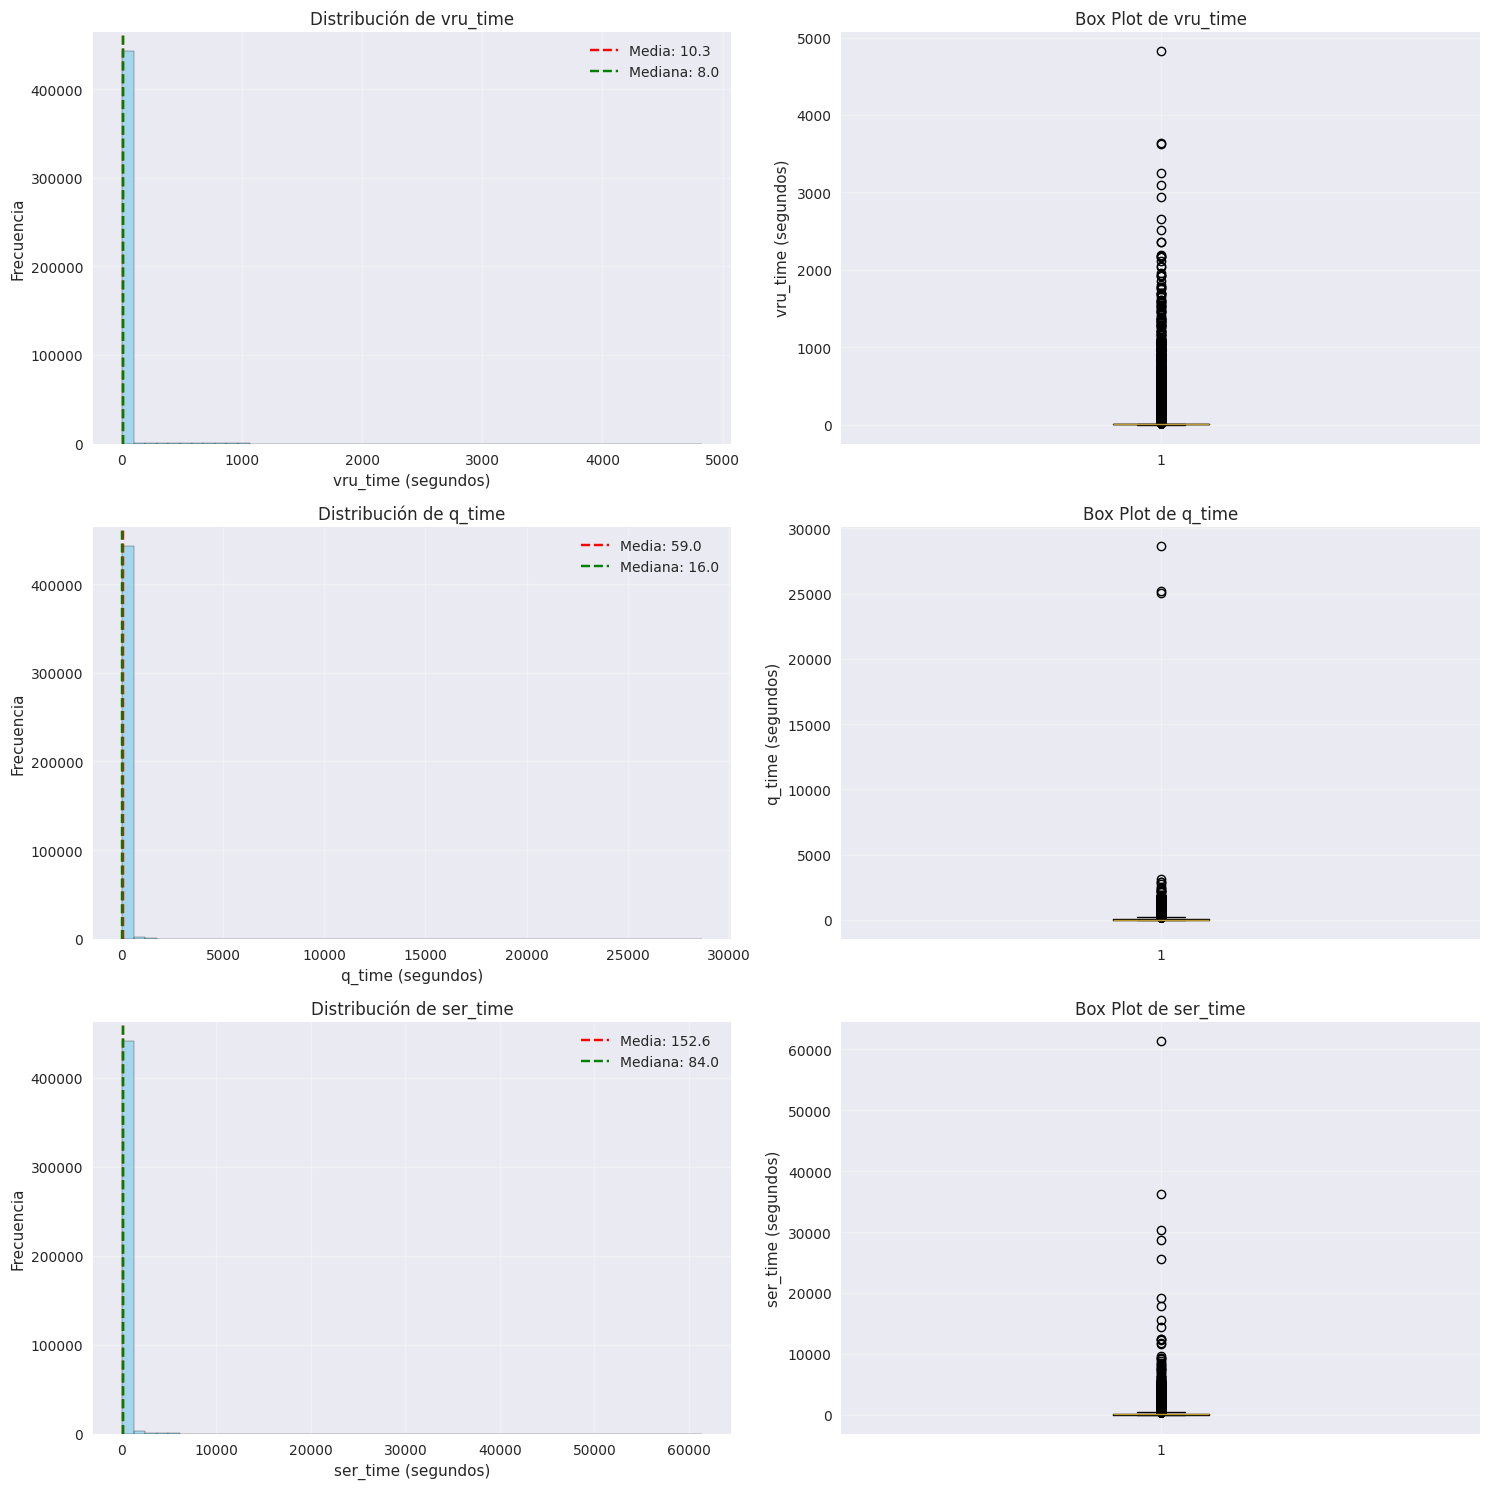


 Resumen estadístico de variables de tiempo:

⏱️ VRU_TIME:
  Media: 10.34 segundos (0.17 minutos)
  Mediana: 8.00 segundos
  Desv. Std: 34.83 segundos
  Min: 0.00 segundos
  Max: 4832.00 segundos (80.53 minutos)
  P95: 17.00 segundos
  Skewness: 42.382

⏱️ Q_TIME:
  Media: 59.00 segundos (0.98 minutos)
  Mediana: 16.00 segundos
  Desv. Std: 119.47 segundos
  Min: 0.00 segundos
  Max: 28693.00 segundos (478.22 minutos)
  P95: 253.00 segundos
  Skewness: 74.613

⏱️ SER_TIME:
  Media: 152.56 segundos (2.54 minutos)
  Mediana: 84.00 segundos
  Desv. Std: 282.37 segundos
  Min: 0.00 segundos
  Max: 61437.00 segundos (1023.95 minutos)
  P95: 545.00 segundos
  Skewness: 41.219


In [6]:
# Análisis de distribuciones - Variables de tiempo clave
print("⏱️ ANÁLISIS DE DISTRIBUCIONES - VARIABLES DE TIEMPO")
print("=" * 55)

# Variables de tiempo principales
time_vars = ['vru_time', 'q_time', 'ser_time']
existing_time_vars = [var for var in time_vars if var in df.columns]

if existing_time_vars:
    fig, axes = plt.subplots(len(existing_time_vars), 2, figsize=(15, 5*len(existing_time_vars)))
    if len(existing_time_vars) == 1:
        axes = axes.reshape(1, -1)
    
    for i, var in enumerate(existing_time_vars):
        # Histograma
        axes[i, 0].hist(df[var], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i, 0].set_title(f'Distribución de {var}')
        axes[i, 0].set_xlabel(f'{var} (segundos)')
        axes[i, 0].set_ylabel('Frecuencia')
        axes[i, 0].grid(True, alpha=0.3)
        
        # Box plot
        axes[i, 1].boxplot(df[var], vert=True)
        axes[i, 1].set_title(f'Box Plot de {var}')
        axes[i, 1].set_ylabel(f'{var} (segundos)')
        axes[i, 1].grid(True, alpha=0.3)
        
        # Estadísticas en el gráfico
        mean_val = df[var].mean()
        median_val = df[var].median()
        axes[i, 0].axvline(mean_val, color='red', linestyle='--', label=f'Media: {mean_val:.1f}')
        axes[i, 0].axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.1f}')
        axes[i, 0].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Análisis estadístico
    print("\n Resumen estadístico de variables de tiempo:")
    for var in existing_time_vars:
        print(f"\n⏱️ {var.upper()}:")
        print(f"  Media: {df[var].mean():.2f} segundos ({df[var].mean()/60:.2f} minutos)")
        print(f"  Mediana: {df[var].median():.2f} segundos")
        print(f"  Desv. Std: {df[var].std():.2f} segundos")
        print(f"  Min: {df[var].min():.2f} segundos")
        print(f"  Max: {df[var].max():.2f} segundos ({df[var].max()/60:.2f} minutos)")
        print(f"  P95: {df[var].quantile(0.95):.2f} segundos")
        print(f"  Skewness: {df[var].skew():.3f}")
else:
    print("⚠️ No se encontraron variables de tiempo estándar")

 DISTRIBUCIONES DE VARIABLES CATEGÓRICAS PRINCIPALES


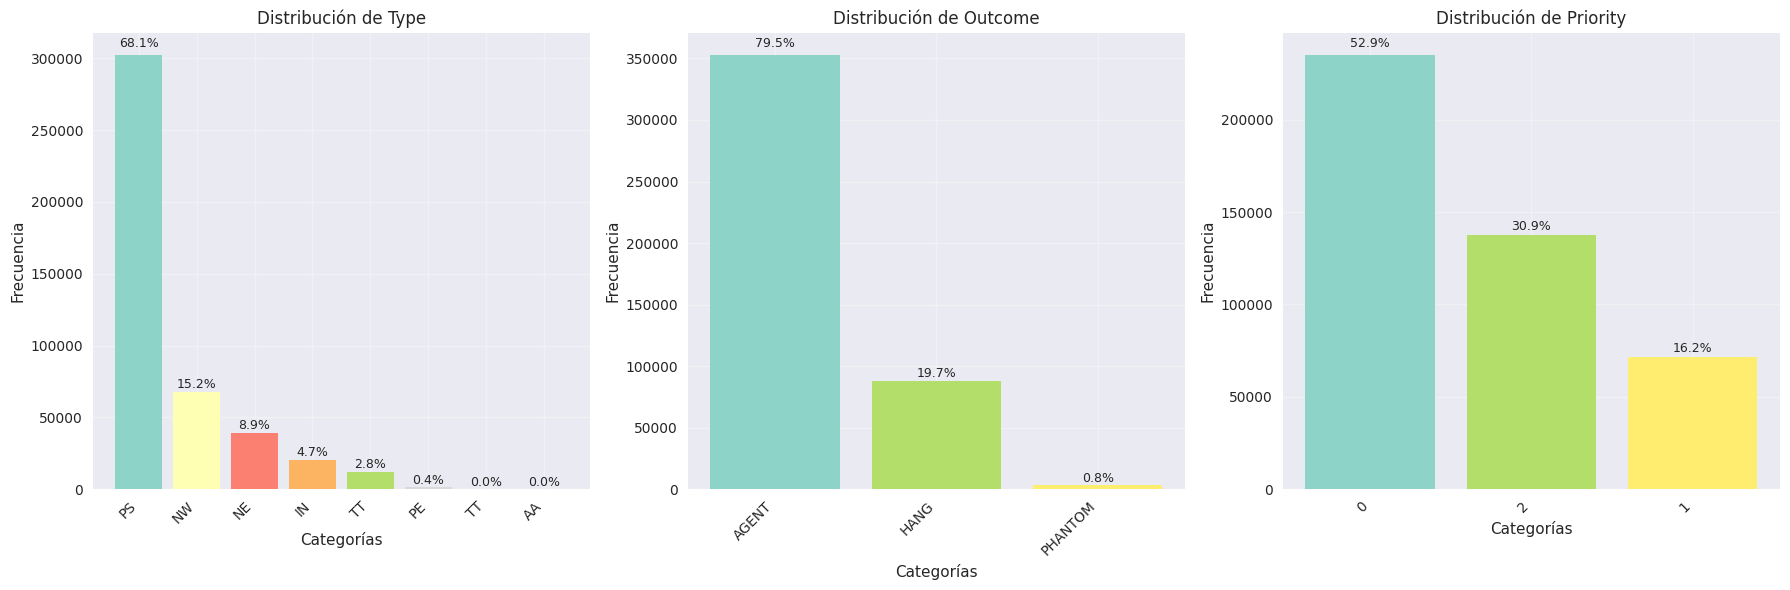


 Resumen de distribuciones categóricas:

 TYPE:
  PS: 302,522 (68.07%)
  NW: 67,728 (15.24%)
  NE: 39,342 (8.85%)
  IN: 20,732 (4.66%)
  TT: 12,289 (2.77%)
  PE: 1,824 (0.41%)
   TT: 6 (0.00%)
  AA: 5 (0.00%)

 OUTCOME:
  AGENT: 353,143 (79.46%)
  HANG: 87,706 (19.73%)
  PHANTOM: 3,599 (0.81%)

 PRIORITY:
  0: 235,168 (52.91%)
  2: 137,453 (30.93%)
  1: 71,827 (16.16%)


In [7]:
# Distribuciones de variables categóricas principales
print(" DISTRIBUCIONES DE VARIABLES CATEGÓRICAS PRINCIPALES")
print("=" * 60)

# Variables categóricas clave para call center
key_categorical = ['type', 'outcome', 'priority']
existing_categorical = [var for var in key_categorical if var in df.columns]

if existing_categorical:
    fig, axes = plt.subplots(1, len(existing_categorical), figsize=(6*len(existing_categorical), 6))
    if len(existing_categorical) == 1:
        axes = [axes]
    
    for i, var in enumerate(existing_categorical):
        value_counts = df[var].value_counts()
        
        # Gráfico de barras
        bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                          color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
        axes[i].set_title(f'Distribución de {var.title()}')
        axes[i].set_xlabel('Categorías')
        axes[i].set_ylabel('Frecuencia')
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        
        # Añadir porcentajes en las barras
        for j, bar in enumerate(bars):
            height = bar.get_height()
            percentage = (height / len(df)) * 100
            axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                        f'{percentage:.1f}%', ha='center', va='bottom', fontsize=9)
        
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Resumen numérico
    print("\n Resumen de distribuciones categóricas:")
    for var in existing_categorical:
        print(f"\n {var.upper()}:")
        value_counts = df[var].value_counts()
        total = len(df)
        for value, count in value_counts.items():
            percentage = (count / total) * 100
            print(f"  {value}: {count:,} ({percentage:.2f}%)")
else:
    print("⚠️ No se encontraron variables categóricas clave")

##  ANÁLISIS TEMPORAL

Análisis de patrones temporales en el call center.

---

In [8]:
# Análisis temporal básico
print(" ANÁLISIS TEMPORAL BÁSICO")
print("=" * 35)

# Verificar si tenemos columnas de fecha
date_columns = [col for col in df.columns if 'date' in col.lower() or df[col].dtype == 'datetime64[ns]']
print(f" Columnas de fecha identificadas: {date_columns}")

if date_columns:
    date_col = date_columns[0]  # Usar la primera columna de fecha
    print(f" Usando columna: {date_col}")
    
    # Convertir a datetime si no lo está
    if df[date_col].dtype != 'datetime64[ns]':
        try:
            df[date_col] = pd.to_datetime(df[date_col])
            print(f" Convertido {date_col} a datetime")
        except:
            print(f"❌ No se pudo convertir {date_col} a datetime")
            date_columns = []
    
    if df[date_col].dtype == 'datetime64[ns]':
        # Información básica temporal
        min_date = df[date_col].min()
        max_date = df[date_col].max()
        date_range = max_date - min_date
        
        print(f"\n Rango temporal:")
        print(f"  Inicio: {min_date.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"  Fin: {max_date.strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"  Duración: {date_range.days} días")
        
        # Crear variables temporales
        df['hour'] = df[date_col].dt.hour
        df['day_of_week'] = df[date_col].dt.day_of_week
        df['month'] = df[date_col].dt.month
        df['day_of_month'] = df[date_col].dt.day
        
        # Mapear días de la semana
        day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
        df['day_name'] = df['day_of_week'].map(lambda x: day_names[x])
        
        print(f"\n Variables temporales creadas: hour, day_of_week, month, day_of_month, day_name")

if not date_columns:
    print("⚠️ No se encontraron columnas de fecha válidas")
    print(" Intentando análisis con variables de tiempo disponibles...")
    
    # Buscar columnas que podrían contener información temporal
    time_like_cols = [col for col in df.columns if any(word in col.lower() 
                     for word in ['time', 'start', 'end', 'entry', 'exit'])]
    print(f" Columnas relacionadas con tiempo: {time_like_cols}")

 ANÁLISIS TEMPORAL BÁSICO
 Columnas de fecha identificadas: ['date', 'startdate']
 Usando columna: date
 Convertido date a datetime

 Rango temporal:
  Inicio: 1999-01-01 00:00:00
  Fin: 1999-12-31 00:00:00
  Duración: 364 días

 Variables temporales creadas: hour, day_of_week, month, day_of_month, day_name


In [ ]:
# Análisis de patrones por hora y día (si tenemos datos temporales)
if 'hour' in df.columns and 'day_name' in df.columns:
    print(" ANÁLISIS DE PATRONES TEMPORALES")
    print("=" * 40)
    
    # Llamadas por hora del día
    calls_by_hour = df.groupby('hour').size()
    
    # Llamadas por día de la semana
    calls_by_day = df.groupby('day_name').size().reindex(day_names)
    
    # Crear visualizaciones
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Llamadas por hora
    axes[0, 0].bar(calls_by_hour.index, calls_by_hour.values, color='lightblue', edgecolor='navy')
    axes[0, 0].set_title('Volumen de Llamadas por Hora del Día')
    axes[0, 0].set_xlabel('Hora')
    axes[0, 0].set_ylabel('Número de Llamadas')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Llamadas por día de la semana
    bars = axes[0, 1].bar(range(len(calls_by_day)), calls_by_day.values, 
                         color='lightgreen', edgecolor='darkgreen')
    axes[0, 1].set_title('Volumen de Llamadas por Día de la Semana')
    axes[0, 1].set_xlabel('Día de la Semana')
    axes[0, 1].set_ylabel('Número de Llamadas')
    axes[0, 1].set_xticks(range(len(day_names)))
    axes[0, 1].set_xticklabels(day_names, rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Heatmap de llamadas (hora vs día)
    pivot_calls = df.pivot_table(values='call_id', index='hour', columns='day_name', 
                                aggfunc='count', fill_value=0)
    pivot_calls = pivot_calls.reindex(columns=day_names)
    
    im = axes[1, 0].imshow(pivot_calls.values, cmap='YlOrRd', aspect='auto')
    axes[1, 0].set_title('Heatmap: Llamadas por Hora y Día')
    axes[1, 0].set_xlabel('Día de la Semana')
    axes[1, 0].set_ylabel('Hora')
    axes[1, 0].set_xticks(range(len(day_names)))
    axes[1, 0].set_xticklabels(day_names, rotation=45)
    axes[1, 0].set_yticks(range(0, 24, 2))
    axes[1, 0].set_yticklabels(range(0, 24, 2))
    
    # Colorbar para el heatmap
    plt.colorbar(im, ax=axes[1, 0], label='Número de Llamadas')
    
    # 4. Tiempo promedio de servicio por hora
    if 'ser_time' in df.columns:
        avg_service_time = df.groupby('hour')['ser_time'].mean()
        axes[1, 1].plot(avg_service_time.index, avg_service_time.values/60, 
                       marker='o', linewidth=2, markersize=6, color='purple')
        axes[1, 1].set_title('Tiempo Promedio de Servicio por Hora')
        axes[1, 1].set_xlabel('Hora')
        axes[1, 1].set_ylabel('Tiempo de Servicio (minutos)')
        axes[1, 1].grid(True, alpha=0.3)
    else:
        axes[1, 1].text(0.5, 0.5, 'Datos de tiempo\nde servicio\nno disponibles', 
                       ha='center', va='center', transform=axes[1, 1].transAxes,
                       fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgray'))
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas temporales
    print("\n Estadísticas temporales:")
    print(f"  Hora pico: {calls_by_hour.idxmax()}:00 ({calls_by_hour.max():,} llamadas)")
    print(f"  Hora valle: {calls_by_hour.idxmin()}:00 ({calls_by_hour.min():,} llamadas)")
    print(f"  Día más ocupado: {calls_by_day.idxmax()} ({calls_by_day.max():,} llamadas)")
    print(f"  Día menos ocupado: {calls_by_day.idxmin()} ({calls_by_day.min():,} llamadas)")
    
else:
    print("⚠️ Variables temporales no disponibles para análisis detallado")

##  ANÁLISIS DE COMPORTAMIENTO DEL CALL CENTER

Análisis específico del comportamiento y eficiencia del call center.

---

In [9]:
# Análisis de comportamiento del call center
print(" ANÁLISIS DE COMPORTAMIENTO DEL CALL CENTER")
print("=" * 50)

# 1. Análisis de outcomes (resultados de llamadas)
if 'outcome' in df.columns:
    print("\n ANÁLISIS DE OUTCOMES (RESULTADOS):")
    outcome_counts = df['outcome'].value_counts()
    outcome_pct = df['outcome'].value_counts(normalize=True) * 100
    
    for outcome, count in outcome_counts.items():
        pct = outcome_pct[outcome]
        print(f"  {outcome}: {count:,} ({pct:.2f}%)")
    
    # Calcular tasa de éxito (llamadas atendidas vs abandonadas)
    if any('HANG' in str(outcome).upper() or 'ABANDON' in str(outcome).upper() 
           for outcome in outcome_counts.index):
        abandoned = sum(count for outcome, count in outcome_counts.items() 
                       if 'HANG' in str(outcome).upper() or 'ABANDON' in str(outcome).upper())
        served = len(df) - abandoned
        service_rate = (served / len(df)) * 100
        abandon_rate = (abandoned / len(df)) * 100
        
        print(f"\n MÉTRICAS DE SERVICIO:")
        print(f"  Tasa de servicio: {service_rate:.2f}%")
        print(f"  Tasa de abandono: {abandon_rate:.2f}%")

# 2. Análisis de prioridades
if 'priority' in df.columns:
    print("\n🔝 ANÁLISIS DE PRIORIDADES:")
    priority_counts = df['priority'].value_counts().sort_index()
    
    for priority, count in priority_counts.items():
        pct = (count / len(df)) * 100
        print(f"  Prioridad {priority}: {count:,} ({pct:.2f}%)")
    
    # Tiempo de servicio por prioridad
    if 'ser_time' in df.columns:
        print("\n⏱️ Tiempo promedio de servicio por prioridad:")
        avg_service_by_priority = df.groupby('priority')['ser_time'].agg(['mean', 'median', 'std'])
        
        for priority in avg_service_by_priority.index:
            mean_time = avg_service_by_priority.loc[priority, 'mean']
            median_time = avg_service_by_priority.loc[priority, 'median']
            std_time = avg_service_by_priority.loc[priority, 'std']
            print(f"  Prioridad {priority}: Media={mean_time:.1f}s, Mediana={median_time:.1f}s, Std={std_time:.1f}s")

# 3. Análisis de tipos de llamada
if 'type' in df.columns:
    print("\n ANÁLISIS DE TIPOS DE LLAMADA:")
    type_counts = df['type'].value_counts()
    
    for call_type, count in type_counts.items():
        pct = (count / len(df)) * 100
        print(f"  {call_type}: {count:,} ({pct:.2f}%)")

# 4. Análisis de servidores
if 'server' in df.columns:
    print("\n🖥️ ANÁLISIS DE SERVIDORES:")
    server_counts = df['server'].value_counts()
    print(f"  Número de servidores activos: {len(server_counts)}")
    print(f"  Servidor más activo: {server_counts.index[0]} ({server_counts.iloc[0]:,} llamadas)")
    print(f"  Distribución de carga: CV = {(server_counts.std() / server_counts.mean() * 100):.1f}%")
    
    # Top 10 servidores
    print("\n Top 10 servidores por volumen:")
    top_servers = server_counts.head(10)
    for i, (server, count) in enumerate(top_servers.items(), 1):
        pct = (count / len(df)) * 100
        print(f"  {i:2d}. {server}: {count:,} ({pct:.2f}%)")

 ANÁLISIS DE COMPORTAMIENTO DEL CALL CENTER

 ANÁLISIS DE OUTCOMES (RESULTADOS):
  AGENT: 353,143 (79.46%)
  HANG: 87,706 (19.73%)
  PHANTOM: 3,599 (0.81%)

 MÉTRICAS DE SERVICIO:
  Tasa de servicio: 80.27%
  Tasa de abandono: 19.73%

🔝 ANÁLISIS DE PRIORIDADES:
  Prioridad 0: 235,168 (52.91%)
  Prioridad 1: 71,827 (16.16%)
  Prioridad 2: 137,453 (30.93%)

⏱️ Tiempo promedio de servicio por prioridad:
  Prioridad 0: Media=144.6s, Mediana=75.0s, Std=305.1s
  Prioridad 1: Media=128.1s, Mediana=73.0s, Std=206.0s
  Prioridad 2: Media=179.0s, Mediana=107.0s, Std=274.3s

 ANÁLISIS DE TIPOS DE LLAMADA:
  PS: 302,522 (68.07%)
  NW: 67,728 (15.24%)
  NE: 39,342 (8.85%)
  IN: 20,732 (4.66%)
  TT: 12,289 (2.77%)
  PE: 1,824 (0.41%)
   TT: 6 (0.00%)
  AA: 5 (0.00%)

🖥️ ANÁLISIS DE SERVIDORES:
  Número de servidores activos: 53
  Servidor más activo: NO_SERVER (96,511 llamadas)
  Distribución de carga: CV = 171.1%

 Top 10 servidores por volumen:
   1. NO_SERVER: 96,511 (21.71%)
   2. SHARON: 27,492

 VISUALIZACIONES DEL COMPORTAMIENTO


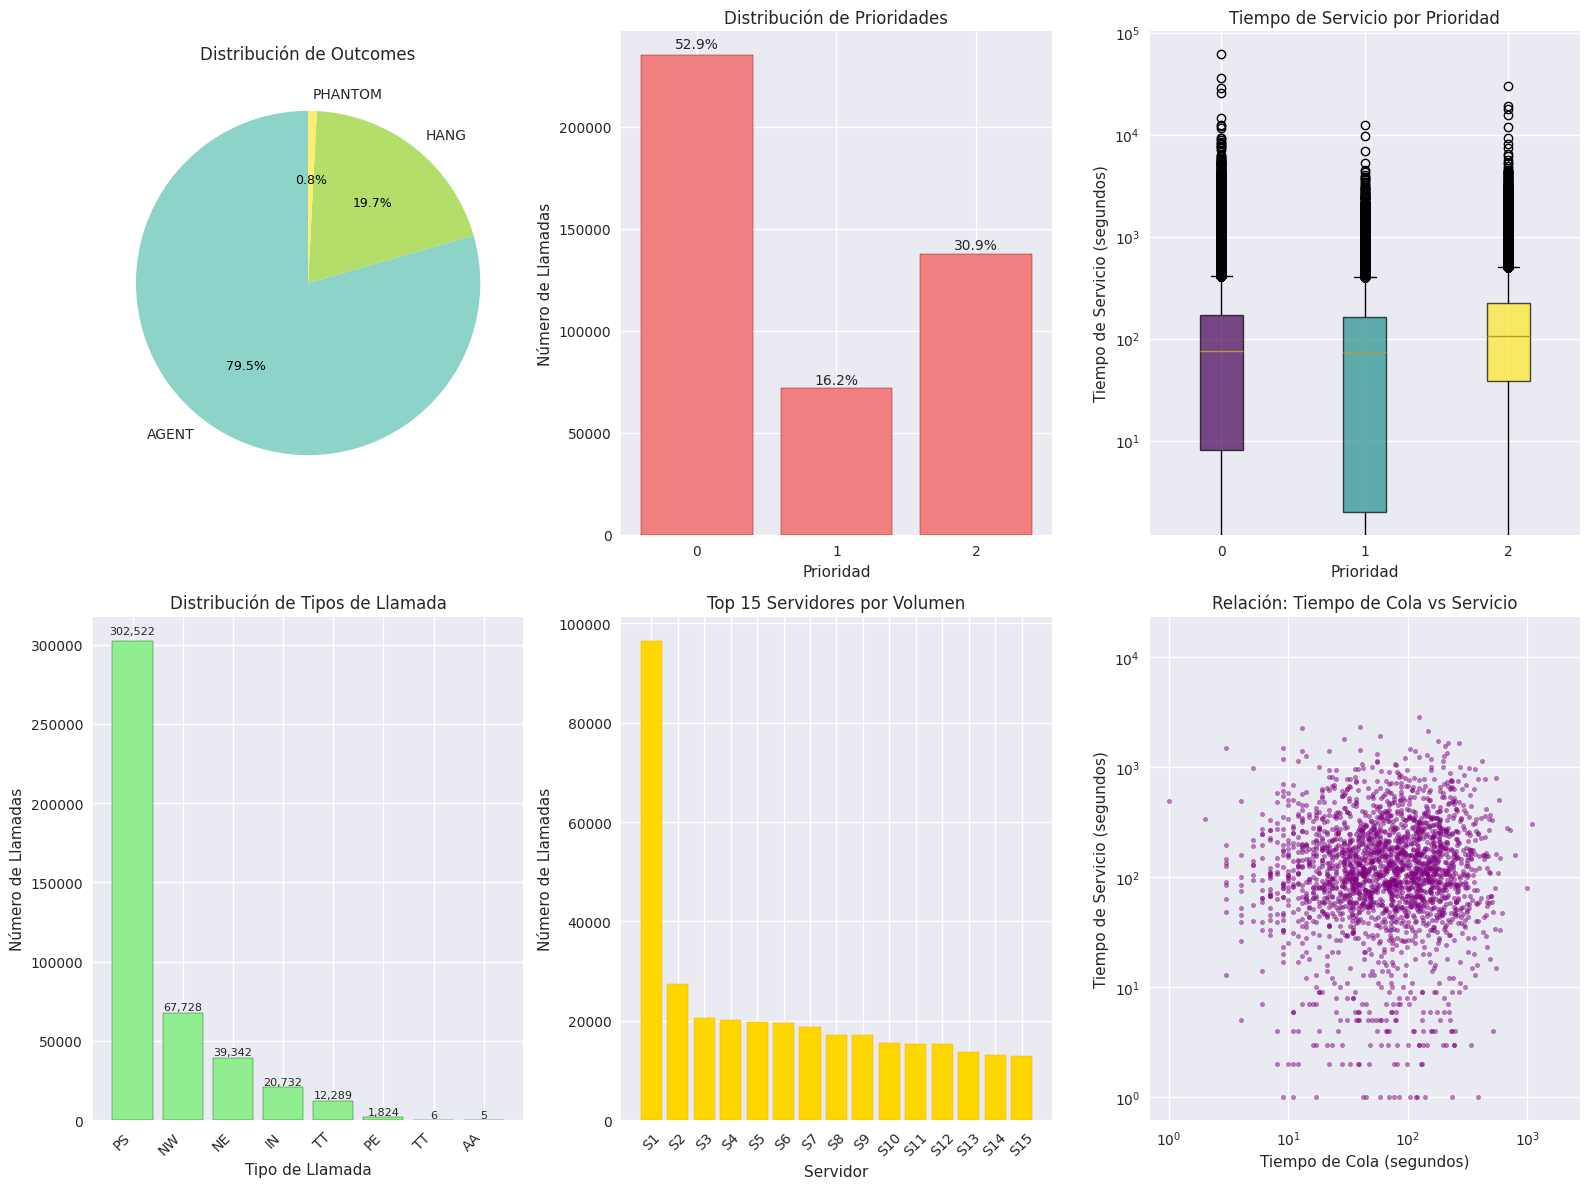

 Visualizaciones del comportamiento completadas


In [10]:
# Visualizaciones del comportamiento del call center
print(" VISUALIZACIONES DEL COMPORTAMIENTO")
print("=" * 40)

# Configurar subplots
fig = plt.figure(figsize=(16, 12))

# 1. Distribución de outcomes
if 'outcome' in df.columns:
    plt.subplot(2, 3, 1)
    outcome_counts = df['outcome'].value_counts()
    colors = plt.cm.Set3(np.linspace(0, 1, len(outcome_counts)))
    
    wedges, texts, autotexts = plt.pie(outcome_counts.values, labels=outcome_counts.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Distribución de Outcomes')
    
    # Mejorar legibilidad
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(9)

# 2. Distribución de prioridades
if 'priority' in df.columns:
    plt.subplot(2, 3, 2)
    priority_counts = df['priority'].value_counts().sort_index()
    bars = plt.bar(priority_counts.index.astype(str), priority_counts.values, 
                  color='lightcoral', edgecolor='darkred')
    plt.title('Distribución de Prioridades')
    plt.xlabel('Prioridad')
    plt.ylabel('Número de Llamadas')
    
    # Añadir porcentajes
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{height/len(df)*100:.1f}%', ha='center', va='bottom')

# 3. Tiempo de servicio por prioridad (boxplot)
if 'priority' in df.columns and 'ser_time' in df.columns:
    plt.subplot(2, 3, 3)
    priorities = sorted(df['priority'].unique())
    service_times_by_priority = [df[df['priority'] == p]['ser_time'].values for p in priorities]
    
    box_plot = plt.boxplot(service_times_by_priority, labels=priorities, patch_artist=True)
    
    # Colorear las cajas
    colors = plt.cm.viridis(np.linspace(0, 1, len(priorities)))
    for patch, color in zip(box_plot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.title('Tiempo de Servicio por Prioridad')
    plt.xlabel('Prioridad')
    plt.ylabel('Tiempo de Servicio (segundos)')
    plt.yscale('log')  # Escala logarítmica para mejor visualización

# 4. Distribución de tipos de llamada
if 'type' in df.columns:
    plt.subplot(2, 3, 4)
    type_counts = df['type'].value_counts()
    bars = plt.bar(range(len(type_counts)), type_counts.values, 
                  color='lightgreen', edgecolor='darkgreen')
    plt.title('Distribución de Tipos de Llamada')
    plt.xlabel('Tipo de Llamada')
    plt.ylabel('Número de Llamadas')
    plt.xticks(range(len(type_counts)), type_counts.index, rotation=45, ha='right')
    
    # Añadir valores en las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{height:,}', ha='center', va='bottom', fontsize=8)

# 5. Top 15 servidores
if 'server' in df.columns:
    plt.subplot(2, 3, 5)
    top_servers = df['server'].value_counts().head(15)
    bars = plt.bar(range(len(top_servers)), top_servers.values, 
                  color='gold', edgecolor='orange')
    plt.title('Top 15 Servidores por Volumen')
    plt.xlabel('Servidor')
    plt.ylabel('Número de Llamadas')
    plt.xticks(range(len(top_servers)), [f'S{i+1}' for i in range(len(top_servers))], rotation=45)

# 6. Relación entre tiempo de cola y servicio
if 'q_time' in df.columns and 'ser_time' in df.columns:
    plt.subplot(2, 3, 6)
    # Muestra aleatoria para mejorar la visualización
    sample_size = min(5000, len(df))
    sample_idx = np.random.choice(len(df), sample_size, replace=False)
    
    plt.scatter(df.iloc[sample_idx]['q_time'], df.iloc[sample_idx]['ser_time'], 
               alpha=0.5, s=10, color='purple')
    plt.title('Relación: Tiempo de Cola vs Servicio')
    plt.xlabel('Tiempo de Cola (segundos)')
    plt.ylabel('Tiempo de Servicio (segundos)')
    plt.xscale('log')
    plt.yscale('log')

plt.tight_layout()
plt.show()

print(" Visualizaciones del comportamiento completadas")